<a href="https://colab.research.google.com/github/FarhanIbneQuddus/DataPreprocessing/blob/main/Preprocessing4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from google.colab import files

In [182]:
data = pd.read_csv("check.csv")

In [183]:
data

,Timestamp,Age,Gender,Residence Area,Education Level,Socioeconomic status (Parent's education level),Study time (In Hours),Attendance rate (In Percentile),Social Media Platform,Time spent in social media (hours),...,Physical activity (30 min+),Withdrawal symptoms (Side effects of not using social media),Sleep Disturbance on Sleep Quality,Mood Modification Scale,Anxiety Scale,Depression Scale,Self-esteem Scale,Last Academic Result (GPA/CGPA),Social Media Distraction During Academic Activities,Column 19
0,26/04/2025 01:14:36,28,Male,Urban,Tertiary Education,Tertiary Education,2,80,YouTube,4,...,Yes,Feeling restless,4,3,4,5,4,3.55,5,NaN
1,26/04/2025 01:24:20,21,Male,Rural,Tertiary Education,No education,3,60,Instagram,5,...,Yes,No symtoms,5,2,2,1,5,3.1,3,NaN
2,27/04/2025 21:38:37,17,Female,Rural,HSC / A' Level,SSC / O' Level,6-7 hour,70%,YouTube,Highest 2 hour,...,Yes,Cravings,1,2,2,1,1,A-,1,NaN
3,27/04/2025 21:42:51,22,Male,Urban,Tertiary Education,HSC / A' Level,1-2hrs,80%,Facebook,6hrs,...,Yes,Feeling restless,3,2,3,3,3,gpa 5/5,1,NaN
4,27/04/2025 21:46:22,26,Male,Urban,Tertiary Education,Tertiary Education,2,85,Facebook,5,...,No,Cravings,4,3,4,3,4,2.78,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,13/07/2025 10:54:54,20,Male,Urban,HSC / A' Level,HSC / A' Level,2-3hours,95℅,Other,10 minutes,...,No,Irritability or agitation,5,1,3,5,1,GPA-5 (HSC),1,NaN
400,13/07/2025 13:55:12,21,Male,Urban,Tertiary Education,Tertiary Education,3,90%,Instagram,5,...,No,No symtoms,2,3,2,4,3,5,3,NaN
401,14/07/2025 04:50:01,21,Male,Urban,Tertiary Education,Tertiary Education,4 hours,95 %,YouTube,2 hours,...,Yes,No symtoms,1,1,3,3,2,4.42,1,NaN
402,14/07/2025 23:01:14,20,Male,Urban,Tertiary Education,Tertiary Education,3-4,80-90,Facebook,7-8,...,No,No symtoms,2,4,4,3,1,5,1,NaN


In [184]:
data.drop(columns=['Timestamp'], inplace=True)
data.drop(columns=['Column 19'], inplace=True)
data.to_csv("check.csv", index=False)

In [185]:
data

,Age,Gender,Residence Area,Education Level,Socioeconomic status (Parent's education level),Study time (In Hours),Attendance rate (In Percentile),Social Media Platform,Time spent in social media (hours),Most time spent in a day,Physical activity (30 min+),Withdrawal symptoms (Side effects of not using social media),Sleep Disturbance on Sleep Quality,Mood Modification Scale,Anxiety Scale,Depression Scale,Self-esteem Scale,Last Academic Result (GPA/CGPA),Social Media Distraction During Academic Activities
0,28,Male,Urban,Tertiary Education,Tertiary Education,2,80,YouTube,4,Night,Yes,Feeling restless,4,3,4,5,4,3.55,5
1,21,Male,Rural,Tertiary Education,No education,3,60,Instagram,5,Afternoon,Yes,No symtoms,5,2,2,1,5,3.1,3
2,17,Female,Rural,HSC / A' Level,SSC / O' Level,6-7 hour,70%,YouTube,Highest 2 hour,Night,Yes,Cravings,1,2,2,1,1,A-,1
3,22,Male,Urban,Tertiary Education,HSC / A' Level,1-2hrs,80%,Facebook,6hrs,Night,Yes,Feeling restless,3,2,3,3,3,gpa 5/5,1
4,26,Male,Urban,Tertiary Education,Tertiary Education,2,85,Facebook,5,Night,No,Cravings,4,3,4,3,4,2.78,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,20,Male,Urban,HSC / A' Level,HSC / A' Level,2-3hours,95℅,Other,10 minutes,Evening,No,Irritability or agitation,5,1,3,5,1,GPA-5 (HSC),1
400,21,Male,Urban,Tertiary Education,Tertiary Education,3,90%,Instagram,5,Night,No,No symtoms,2,3,2,4,3,5,3
401,21,Male,Urban,Tertiary Education,Tertiary Education,4 hours,95 %,YouTube,2 hours,Evening,Yes,No symtoms,1,1,3,3,2,4.42,1
402,20,Male,Urban,Tertiary Education,Tertiary Education,3-4,80-90,Facebook,7-8,Afternoon,No,No symtoms,2,4,4,3,1,5,1


In [186]:
data.shape

(404, 19)

In [187]:
studyTime = 'Study time (In Hours)'
attendance = 'Attendance rate (In Percentile)'
result = 'Last Academic Result (GPA/CGPA)'
timeSpent = 'Time spent in social media (hours)'
age = 'Age'
eduLevel = 'Education Level'
targetClass = 'Withdrawal symptoms (Side effects of not using social media)'

In [188]:
def timeClean(value):
    newVal = str(value).lower().strip()

    if "no" in newVal or "none" in newVal:
        return 0.0
    if "less than 30" in newVal:
        return 0.5
    if "few" in newVal or "some" in newVal:
        return 0.5

    hours = re.findall(r'(\d+)\s*(?:hr|hrs|hour|hours)', newVal)
    minutes = re.findall(r'(\d+)\s*(?:min|mins|minute|minutes)', newVal)

    h = int(hours[0]) if hours else 0
    m = int(minutes[0]) if minutes else 0

    if h > 0 and m > 0:
        if m > 30:
            return round(h + 1, 1)
        else:
            return round(h + 0.5, 1)
    elif m > 0:
        return 0.5
    else:
        nums = list(map(int, re.findall(r'\d+', newVal)))
        if len(nums) == 1:
            return float(nums[0])
        elif len(nums) >= 2:
            return round((nums[0] + nums[1]) / 2, 1)
        return 0.0

In [189]:
def percentClean(value):
    value = str(value).lower().strip()

    if "everyday" in value:
        return 100

    newValue = value.replace('%', '').replace('℅', '')

    rng = re.search(r'(\d+)\s*[-–]\s*(\d+)', newValue)
    if rng:
        a, b = map(int, rng.groups())
        return round((a + b) / 2)

    ab = re.search(r'above\s*(\d+)', newValue)
    if ab:
        return int(ab.group(1))

    nums = list(map(float, re.findall(r'\d+\.?\d*', newValue)))

    if not nums:
        return 0

    return round(nums[-1])

In [190]:
def cgpaClean(row):
    cgpa = str(row[result]).strip().lower()
    edu = str(row[eduLevel]).strip().lower()

    if cgpa == "" or cgpa == "...":
        return 0.0

    grade_map = {
        'a+': (4.0, 5.0), 'a': (3.75, 4.5), 'a-': (3.5, 4.0),
        'b+': (3.25, 3.5), 'b': (3.0, 3.0), 'b-': (2.75, 2.5),
        'c+': (2.5, 2.0), 'c': (2.25, 1.5), 'c-': (2.0, 1.0),
        'd+': (1.5, 0.5), 'd': (1.0, 0.0), 'f': (0.0, 0.0)
    }

    if cgpa in grade_map:
        if "tertiary" in edu:
            return grade_map[cgpa][0]
        elif "hsc" in edu or "a' level" in edu:
            return grade_map[cgpa][1]
        else:
            return 0.0

    nums = re.findall(r'\d+\.\d+|\d+', cgpa)
    fnums = [float(n) for n in nums]

    res = [num for num in fnums if num <= 5.0]

    if res:
        return max(res)

    return 0.0

In [191]:
def ageClean(value):
    value = str(value).strip().lower()

    age = re.findall(r'\d+', value)
    if not age:
        return 0

    num = int(age[0])

    if 1900 < num <= 2025:
        return 2025 - num

    if 5 <= num <= 100:
        return num

    return 0

In [192]:
data[age] = data[age].apply(ageClean)
data[studyTime] = data[studyTime].apply(timeClean)
data[attendance] = data[attendance].apply(percentClean)
data[timeSpent] = data[timeSpent].apply(timeClean)
data[result] = data.apply(cgpaClean, axis=1)

In [193]:
print(data.iloc[261][result])

5.0


In [194]:
data

,Age,Gender,Residence Area,Education Level,Socioeconomic status (Parent's education level),Study time (In Hours),Attendance rate (In Percentile),Social Media Platform,Time spent in social media (hours),Most time spent in a day,Physical activity (30 min+),Withdrawal symptoms (Side effects of not using social media),Sleep Disturbance on Sleep Quality,Mood Modification Scale,Anxiety Scale,Depression Scale,Self-esteem Scale,Last Academic Result (GPA/CGPA),Social Media Distraction During Academic Activities
0,28,Male,Urban,Tertiary Education,Tertiary Education,2.0,80,YouTube,4.0,Night,Yes,Feeling restless,4,3,4,5,4,3.55,5
1,21,Male,Rural,Tertiary Education,No education,3.0,60,Instagram,5.0,Afternoon,Yes,No symtoms,5,2,2,1,5,3.10,3
2,17,Female,Rural,HSC / A' Level,SSC / O' Level,6.5,70,YouTube,2.0,Night,Yes,Cravings,1,2,2,1,1,4.00,1
3,22,Male,Urban,Tertiary Education,HSC / A' Level,1.5,80,Facebook,6.0,Night,Yes,Feeling restless,3,2,3,3,3,5.00,1
4,26,Male,Urban,Tertiary Education,Tertiary Education,2.0,85,Facebook,5.0,Night,No,Cravings,4,3,4,3,4,2.78,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,20,Male,Urban,HSC / A' Level,HSC / A' Level,2.5,95,Other,0.5,Evening,No,Irritability or agitation,5,1,3,5,1,5.00,1
400,21,Male,Urban,Tertiary Education,Tertiary Education,3.0,90,Instagram,5.0,Night,No,No symtoms,2,3,2,4,3,5.00,3
401,21,Male,Urban,Tertiary Education,Tertiary Education,4.0,95,YouTube,2.0,Evening,Yes,No symtoms,1,1,3,3,2,4.42,1
402,20,Male,Urban,Tertiary Education,Tertiary Education,3.5,85,Facebook,7.5,Afternoon,No,No symtoms,2,4,4,3,1,5.00,1


In [195]:
zero = (data == 0.0).sum().sum()
print("Total 0.0 float values:", zero)

Total 0.0 float values: 30


Count With symptoms: 184
Count No symptoms: 220


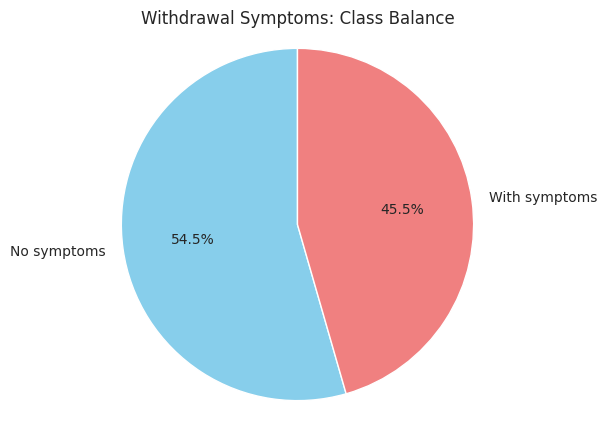

In [196]:
withSymptoms = [
    'Cravings',
    'Irritability or agitation',
    'Feeling restless',
    'Trouble concentrating'
]

classList = []

for val in data[targetClass]:
    if val in withSymptoms:
        classList.append('With symptoms')
    else:
        classList.append('No symptoms')

data['classList'] = classList

counts = data['classList'].value_counts()

print("Count With symptoms:", counts.get('With symptoms', 0))
print("Count No symptoms:", counts.get('No symptoms', 0))


plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightcoral'])
plt.title('Withdrawal Symptoms: Class Balance')
plt.axis('equal')
plt.show()

/tmp/ipython-input-1459515586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=classList, y=age, data=data, palette=['#ff6666', '#66b3ff'])


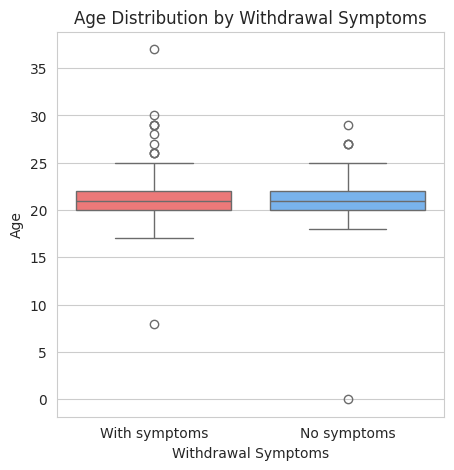

/tmp/ipython-input-1459515586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=classList, y=age, data=data, jitter=True, palette=['#ff6666', '#66b3ff'], alpha=0.6)


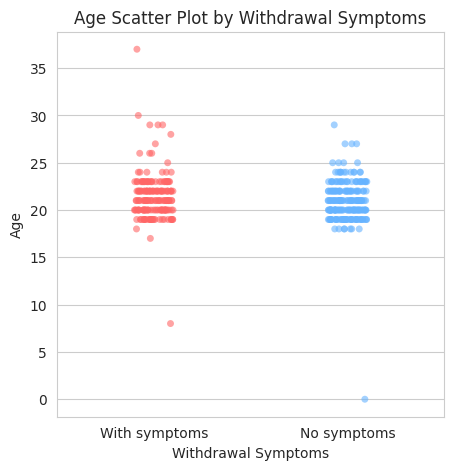

In [197]:
plt.figure(figsize=(5,5))
sns.boxplot(x=classList, y=age, data=data, palette=['#ff6666', '#66b3ff'])
plt.title('Age Distribution by Withdrawal Symptoms')
plt.xlabel('Withdrawal Symptoms')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(5,5))
sns.stripplot(x=classList, y=age, data=data, jitter=True, palette=['#ff6666', '#66b3ff'], alpha=0.6)
plt.title('Age Scatter Plot by Withdrawal Symptoms')
plt.xlabel('Withdrawal Symptoms')
plt.ylabel('Age')
plt.show()

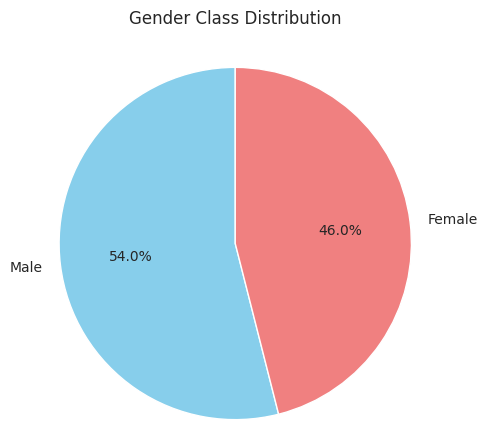

In [198]:
data = pd.DataFrame(data)

gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Class Distribution', pad=20)
plt.axis('equal')
plt.show()


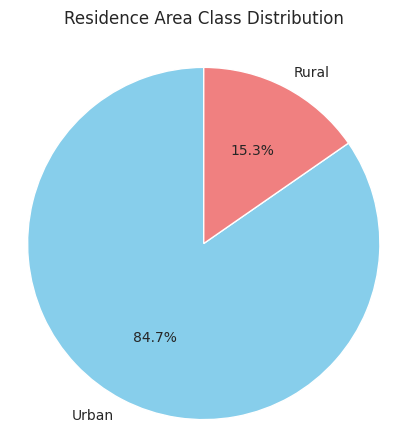

In [199]:
data = pd.DataFrame(data)
area_counts = data['Residence Area  '].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Residence Area Class Distribution', pad=20)
plt.axis('equal')
plt.show()

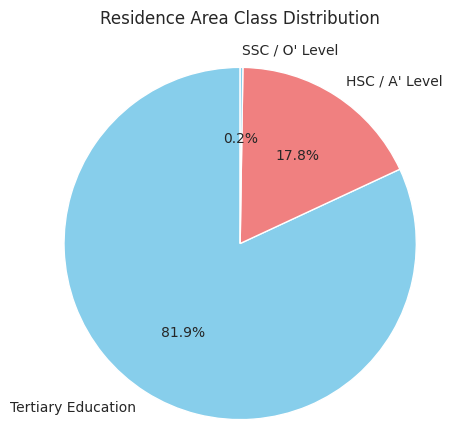

In [200]:
data = pd.DataFrame(data)
edu_counts = data['Education Level'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Residence Area Class Distribution', pad=20)
plt.axis('equal')
plt.show()

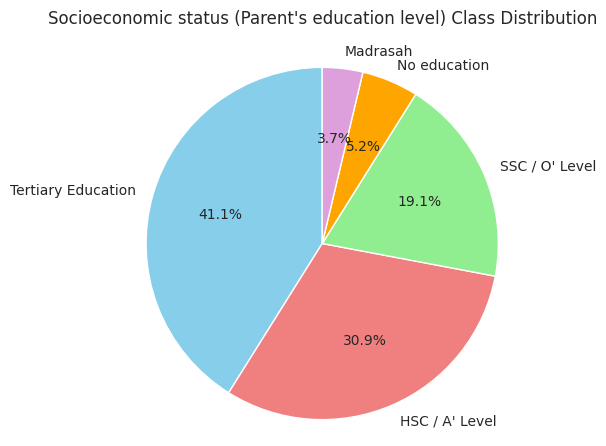

In [201]:
data = pd.DataFrame(data)


socio_counts = data["Socioeconomic status (Parent's education level)"].value_counts()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'plum']

plt.figure(figsize=(5, 5))
plt.pie(socio_counts, labels=socio_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Socioeconomic status (Parent's education level) Class Distribution", pad=20)
plt.axis('equal')
plt.show()

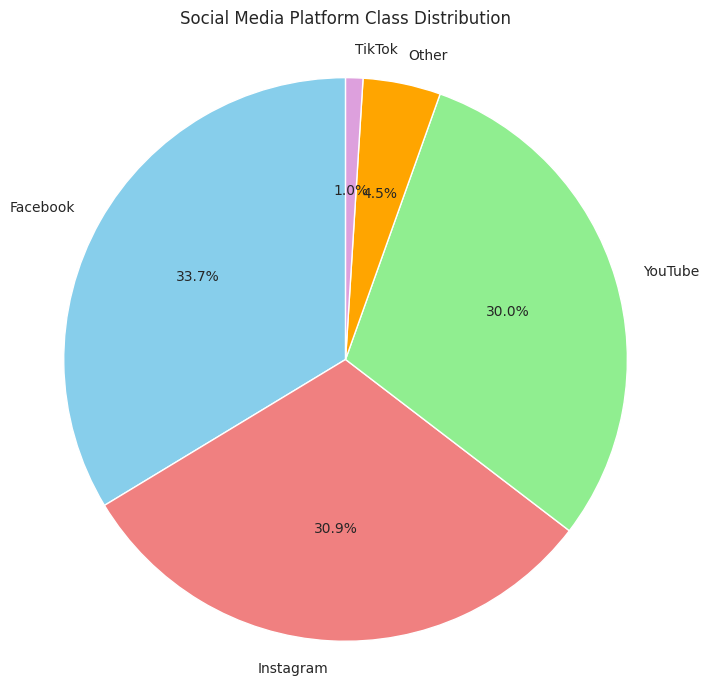

In [202]:
data = pd.DataFrame(data)


media_counts = data['Social Media Platform'].value_counts()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'plum']


plt.figure(figsize=(8, 8))
plt.pie(media_counts, labels=media_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Social Media Platform Class Distribution", pad=20)
plt.axis('equal')
plt.show()

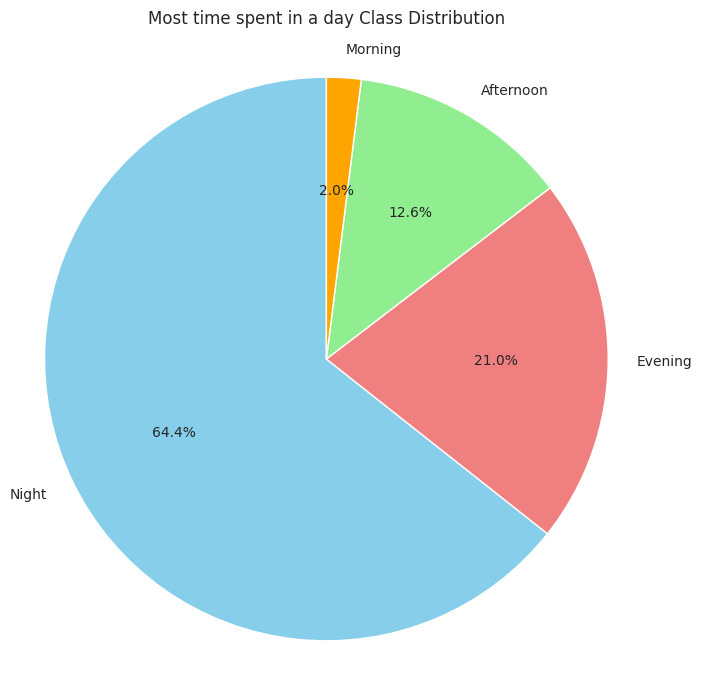

In [203]:
data = pd.DataFrame(data)


time_counts = data['Most time spent in a day'].value_counts()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']


plt.figure(figsize=(8, 8))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Most time spent in a day Class Distribution", pad=20)
plt.axis('equal')
plt.show()

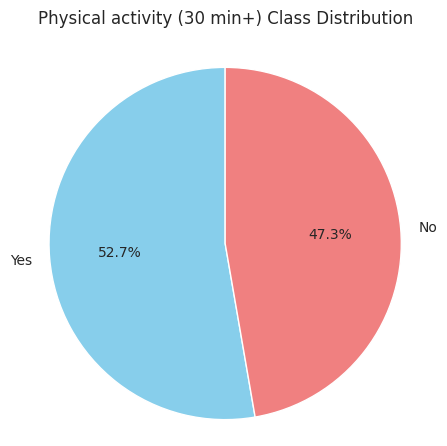

In [204]:
data = pd.DataFrame(data)


phy_counts = data['Physical activity (30 min+) '].value_counts()

colors = ['skyblue', 'lightcoral']


plt.figure(figsize=(5, 5))
plt.pie(phy_counts, labels=phy_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Physical activity (30 min+) Class Distribution", pad=20)
plt.axis('equal')
plt.show()

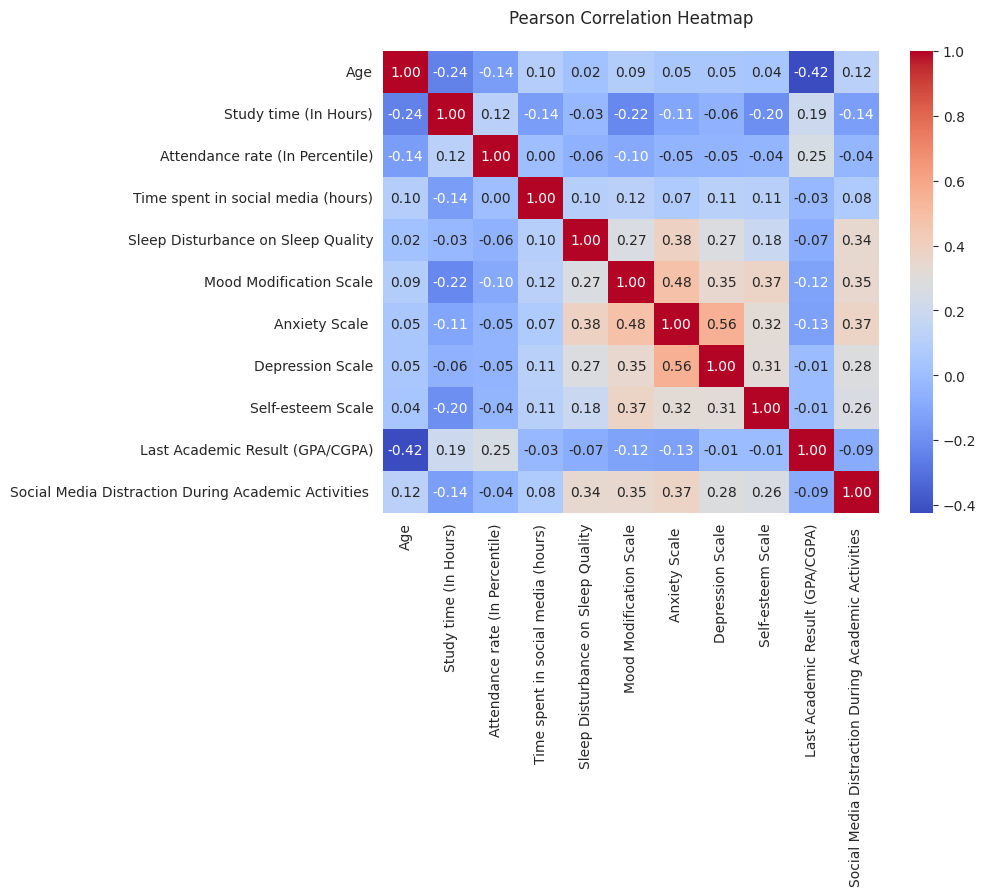

In [205]:
data = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap', pad=20)
plt.show()

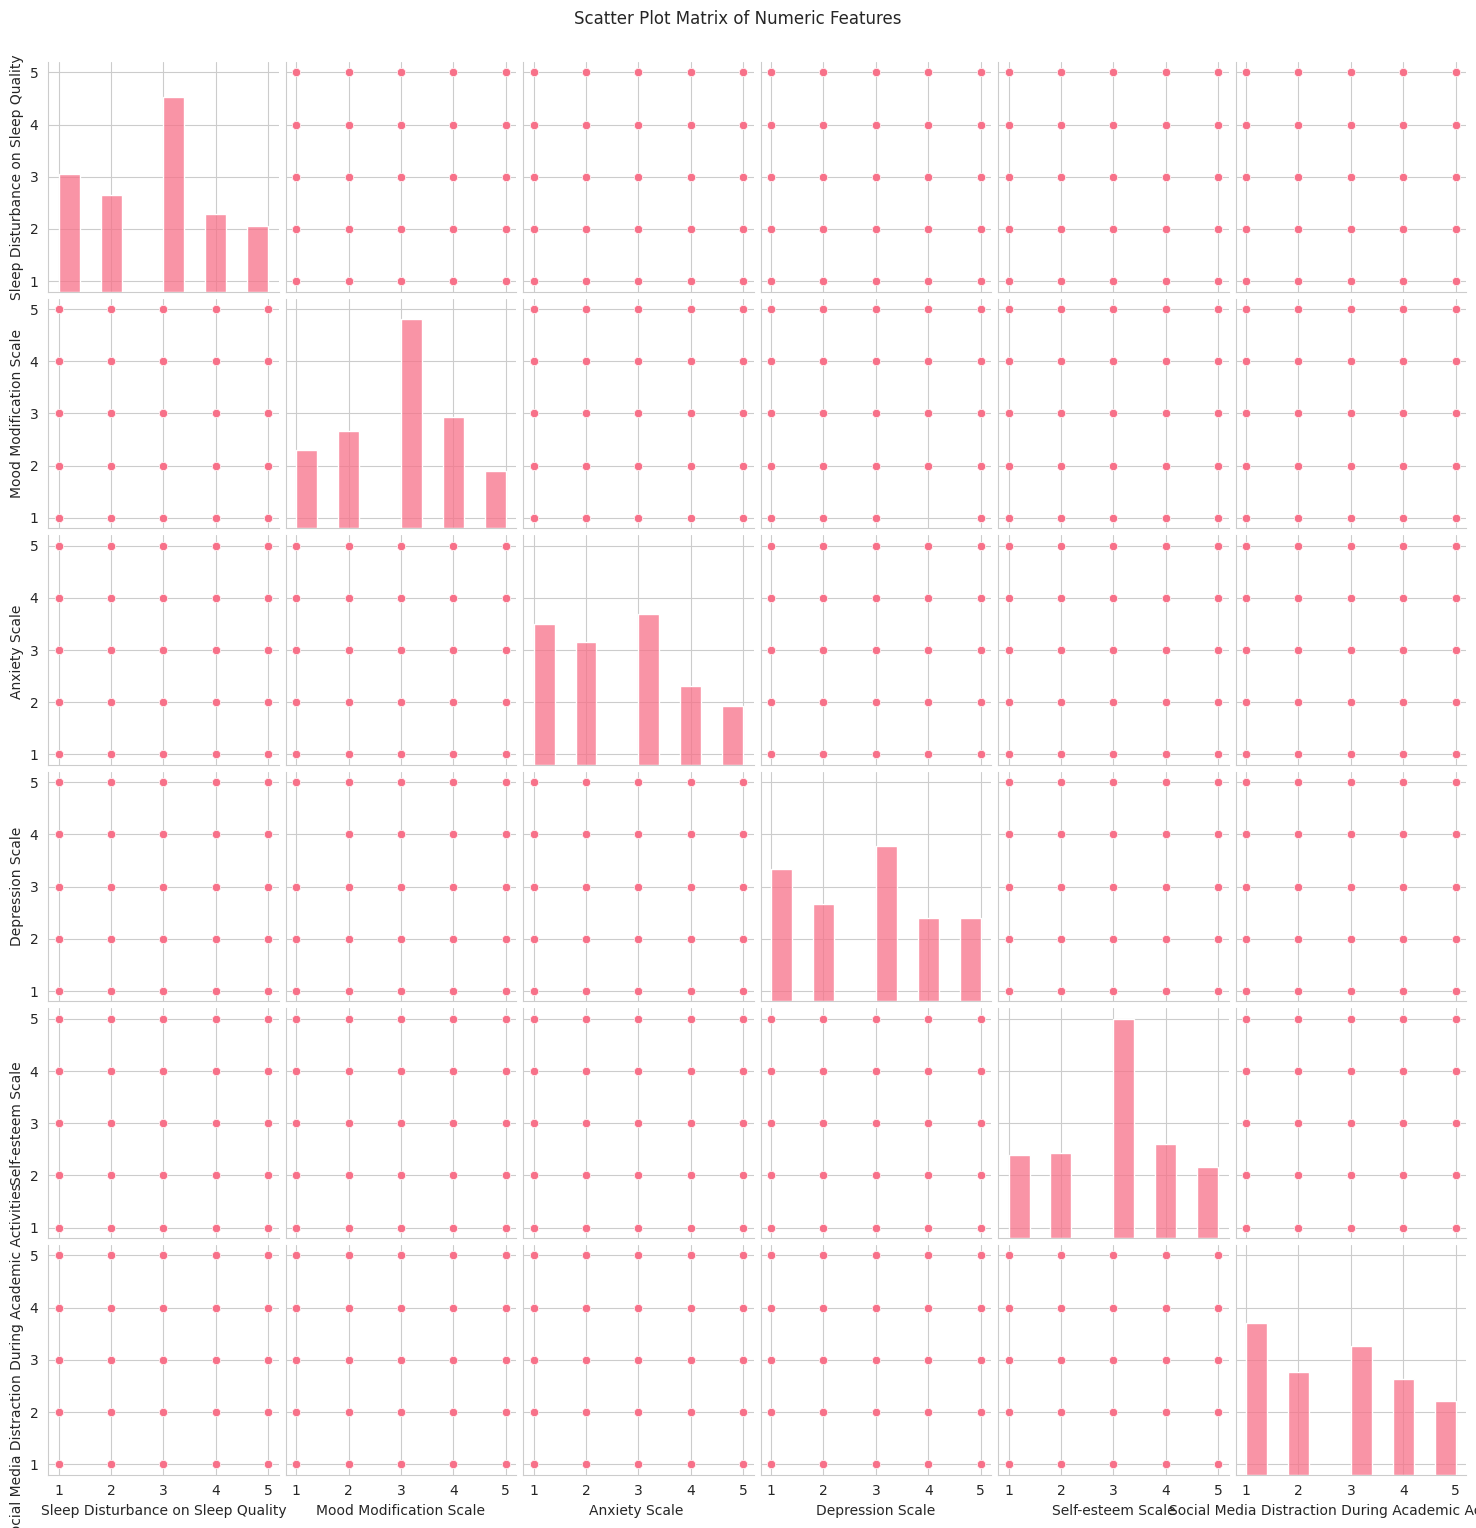

In [206]:
data = pd.read_csv("check.csv")

numeric_data = data.select_dtypes(include='number')

sns.pairplot(numeric_data)
plt.suptitle("Scatter Plot Matrix of Numeric Features", y=1.02)
plt.show()


Numerical columns to analyze: ['Sleep Disturbance on Sleep Quality', 'Mood Modification Scale', 'Anxiety Scale ', 'Depression Scale', 'Self-esteem Scale', 'Social Media Distraction During Academic Activities ']

Normality Analysis for: Sleep Disturbance on Sleep Quality


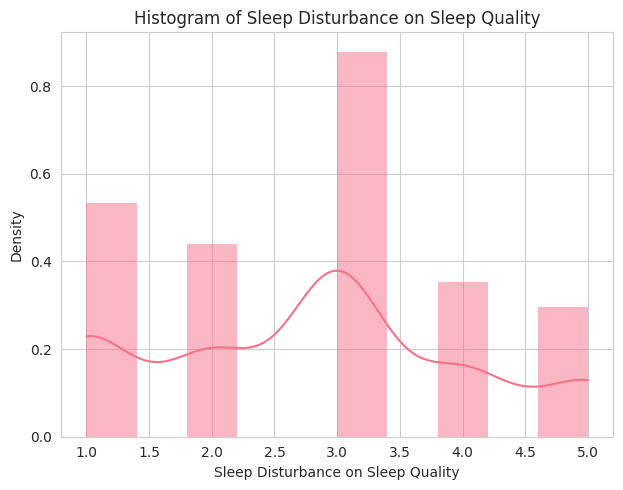


Shapiro-Wilk Test for Sleep Disturbance on Sleep Quality:
Test statistic = 0.8982, p-value = 0.0000
Feature Sleep Disturbance on Sleep Quality does not appear normally distributed (reject H0)

Normality Analysis for: Mood Modification Scale


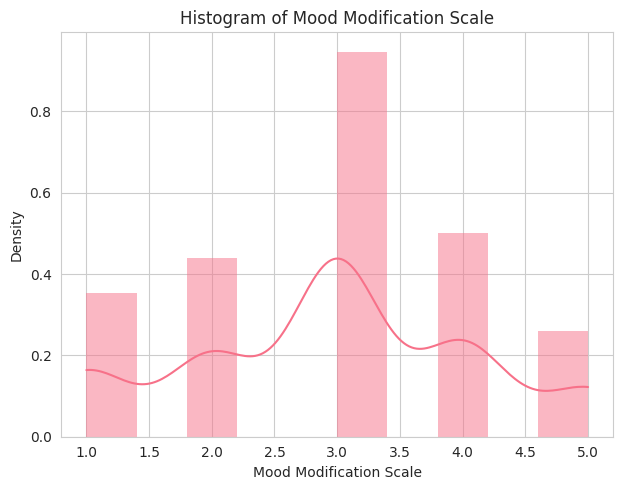


Shapiro-Wilk Test for Mood Modification Scale:
Test statistic = 0.9103, p-value = 0.0000
Feature Mood Modification Scale does not appear normally distributed (reject H0)

Normality Analysis for: Anxiety Scale 


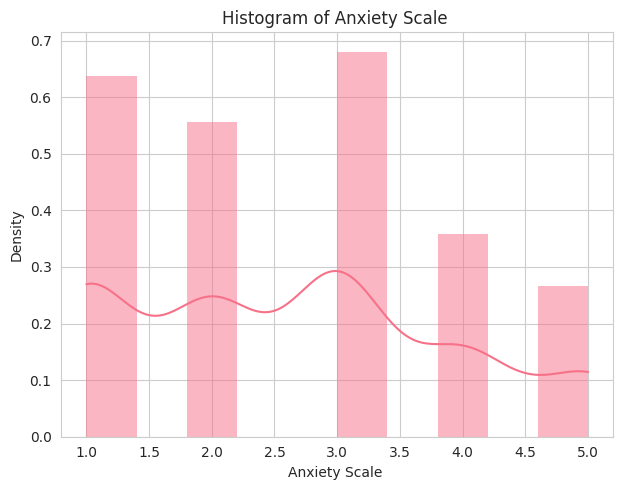


Shapiro-Wilk Test for Anxiety Scale :
Test statistic = 0.8920, p-value = 0.0000
Feature Anxiety Scale  does not appear normally distributed (reject H0)

Normality Analysis for: Depression Scale


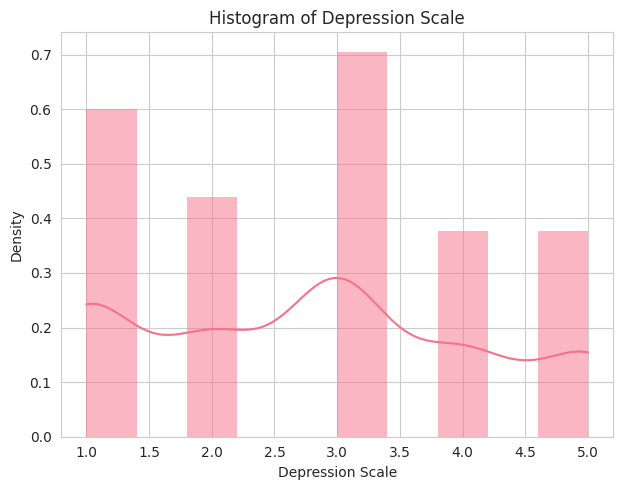


Shapiro-Wilk Test for Depression Scale:
Test statistic = 0.8908, p-value = 0.0000
Feature Depression Scale does not appear normally distributed (reject H0)

Normality Analysis for: Self-esteem Scale


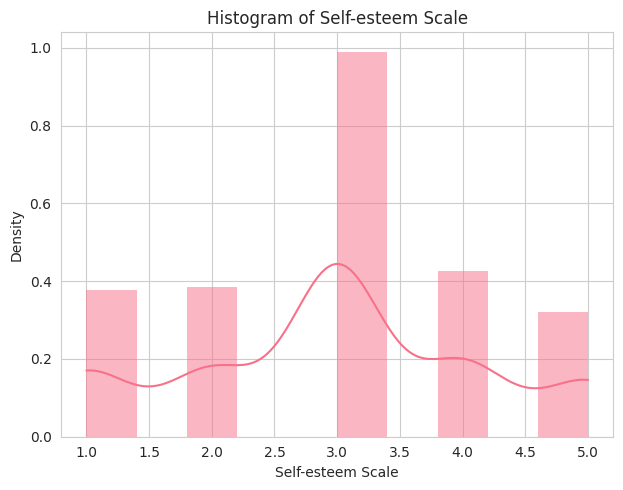


Shapiro-Wilk Test for Self-esteem Scale:
Test statistic = 0.9034, p-value = 0.0000
Feature Self-esteem Scale does not appear normally distributed (reject H0)

Normality Analysis for: Social Media Distraction During Academic Activities 


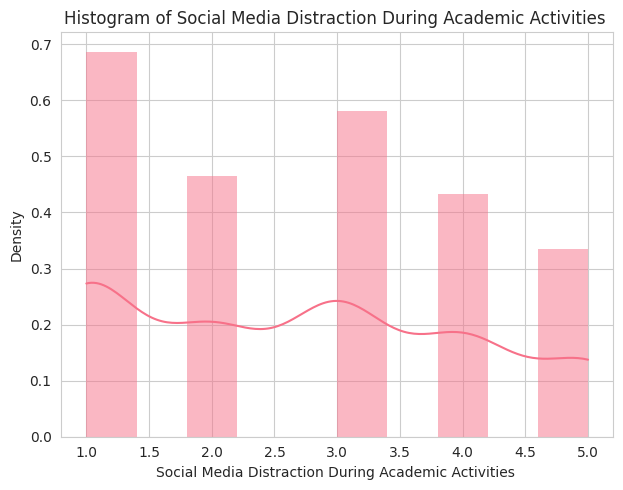


Shapiro-Wilk Test for Social Media Distraction During Academic Activities :
Test statistic = 0.8830, p-value = 0.0000
Feature Social Media Distraction During Academic Activities  does not appear normally distributed (reject H0)


In [207]:
# Select numerical columns for normality check
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns to analyze:", numeric_cols)

# Set up the plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a function to check normality
def check_normality(feature):
    plt.figure(figsize=(12, 5))

    # Histogram with density plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')


    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test (for samples < 5000)
    if len(data[feature].dropna()) < 5000:
        stat, p = stats.shapiro(data[feature].dropna())
        print(f"\nShapiro-Wilk Test for {feature}:")
        print(f"Test statistic = {stat:.4f}, p-value = {p:.4f}")
        if p > 0.05:
            print(f"Feature {feature} appears normally distributed (fail to reject H0)")
        else:
            print(f"Feature {feature} does not appear normally distributed (reject H0)")
    else:
        print("\nNote: Sample size too large for Shapiro-Wilk test, using Kolmogorov-Smirnov test")
        stat, p = stats.kstest((data[feature]-data[feature].mean())/data[feature].std(), 'norm')
        print(f"Kolmogorov-Smirnov Test for {feature}:")
        print(f"Test statistic = {stat:.4f}, p-value = {p:.4f}")

# Check normality for each numerical feature
for feature in numeric_cols:
    print(f"\n{'='*50}\nNormality Analysis for: {feature}\n{'='*50}")
    check_normality(feature)